In [5]:
# Langkah Pertama : Mmebuat Data Palsu Sebagai Contoh
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from IPython.display import display


# Generate dummy data
np.random.seed(0)
n_obs = 25
weekly_electricity_data = pd.DataFrame({
    'Family_1_Electricity': np.random.normal(1000, 200, n_obs),
    'Family_2_Electricity': np.random.normal(900, 150, n_obs),
    'Family_3_Electricity': np.random.normal(1100, 250, n_obs),
    'Family_4_Electricity': np.random.normal(950, 180, n_obs),
    'Family_5_Electricity': np.random.normal(1050, 220, n_obs),
    'Temperature': np.random.normal(25, 5, n_obs),
    'Unemployment_Rate': np.random.normal(5, 2, n_obs),
    'Income': np.random.normal(5000, 1000, n_obs),  # New exogenous variable
    'Population': np.random.randint(1000, 5000, n_obs)  # New exogenous variable
})

# Split data into train and test sets
train_size = int(0.8 * len(weekly_electricity_data))
train_data = weekly_electricity_data[:train_size]
test_data = weekly_electricity_data[train_size:]

display(weekly_electricity_data)

,Family_1_Electricity,Family_2_Electricity,Family_3_Electricity,Family_4_Electricity,Family_5_Electricity,Temperature,Unemployment_Rate,Income,Population
0,1352.810469,681.845149,876.133360,826.734184,1464.293153,24.251827,4.863517,5681.594518,2660
1,1080.031442,906.863778,1196.725624,793.256513,753.493007,22.824232,8.426685,4196.590336,1163
2,1195.747597,871.922422,972.298716,845.807060,770.493300,34.246319,3.510490,4310.450222,4642
3,1448.178640,1129.916882,804.841954,893.920544,1263.267276,28.361474,3.347123,4544.467496,1945
4,1373.511598,1120.403815,1092.954443,960.109762,791.912851,27.037309,4.803095,5017.479159,2130
5,804.544424,923.242114,1207.082968,740.273029,1477.596661,21.150420,3.673043,4646.006089,1201
6,1190.017684,956.724378,1116.629306,1112.148768,959.003824,27.696246,7.253272,3625.048707,4372
7,969.728558,766.832138,1175.617974,1033.819239,885.559941,21.628337,2.840137,4356.381597,2805
8,979.356230,602.880530,941.419477,673.476136,1473.047246,25.159153,2.705063,2776.596848,3937
9,1082.119700,847.813178,1009.314709,1217.885395,1375.713254,21.820770,4.124360,5625.231451,2862


ADF Test Results:
                      Family_1_Electricity  Family_2_Electricity  \
ADF Statistic                -6.083877e+00             -1.857555   
p-value                       1.075958e-07              0.352284   
Critical Value (1%)          -4.223238e+00             -4.223238   
Critical Value (5%)          -3.189369e+00             -3.189369   
Critical Value (10%)         -2.729839e+00             -2.729839   

                      Family_3_Electricity  Family_4_Electricity  \
ADF Statistic                    -3.794605             -2.073749   
p-value                           0.002963              0.255201   
Critical Value (1%)              -4.223238             -4.012034   
Critical Value (5%)              -3.189369             -3.104184   
Critical Value (10%)             -2.729839             -2.690987   

                      Family_5_Electricity  Temperature  Unemployment_Rate  \
ADF Statistic                -1.196922e+01    -4.471569         -56.785543   
p-value 

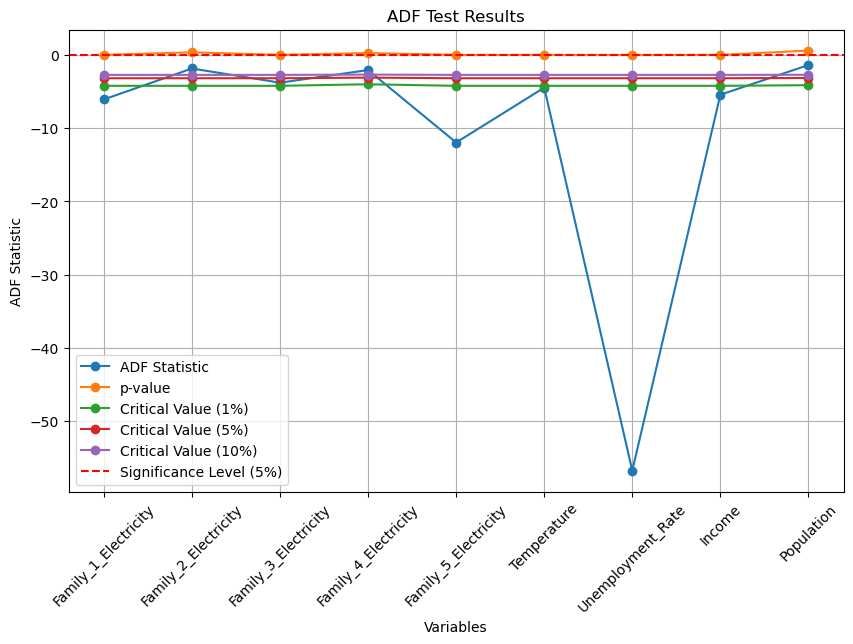

In [6]:
# Function to perform ADF test and print results
def adf_test(series, name):
    result = adfuller(series)
    return pd.Series({
        'ADF Statistic': result[0],
        'p-value': result[1],
        'Critical Value (1%)': result[4]['1%'],
        'Critical Value (5%)': result[4]['5%'],
        'Critical Value (10%)': result[4]['10%']
    })

# Perform ADF test for each variable
adf_results = pd.DataFrame()
for col in train_data.columns:
    adf_results[col] = adf_test(train_data[col], col)

# Print ADF test results
print("ADF Test Results:")
print(adf_results)

# Visualize ADF test results
plt.figure(figsize=(10, 6))
for col in adf_results.index:
    plt.plot(adf_results.columns, adf_results.loc[col], marker='o', label=col)
plt.axhline(y=0.05, color='r', linestyle='--', label='Significance Level (5%)')
plt.title('ADF Test Results')
plt.xlabel('Variables')
plt.ylabel('ADF Statistic')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.show()


In [7]:
# Tahap 1: Normalisasi Data uyntuk mengubah nilai bulat (1,2,3,4) ke desimal (0,2,333222)
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_train_data = scaler.fit_transform(train_data)
scaled_test_data = scaler.transform(test_data)

# Tahap 2: Penyetelan Parameter
p = 3  # Order of autoregressive
q = 3  # Order of moving average
k_exog = 4  # Number of exogenous variables

# Tahap 3: Penyetelan Koefisien
# Inisialisasi koefisien secara acak
np.random.seed(1)
phi = np.random.randn(p, len(train_data.columns), len(train_data.columns))  # Autoregressive coefficients
theta = np.random.randn(q, len(train_data.columns), len(train_data.columns))  # Moving average coefficients
beta = np.random.randn(len(train_data.columns), k_exog)  # Coefficients for exogenous variables

# Preallocate arrays to store forecasts
forecast = np.zeros((len(test_data), len(train_data.columns)))

# Inisialisasi lagged values
endog_lagged = np.zeros((p, len(train_data.columns)))
exog_lagged = np.zeros((p, k_exog))

# Loop untuk Prediksi
for t in range(len(scaled_test_data)):
    # Menghitung nilai lagged untuk variabel endogen
    endog_lagged[1, :] = endog_lagged[0, :]
    endog_lagged[0, :] = scaled_train_data[-1]
    
    # Menghitung nilai lagged untuk variabel eksogen
    exog_lagged[1, :] = exog_lagged[0, :]
    exog_lagged[0, :] = scaled_train_data[-1, -k_exog:]

    # Menghitung error residual
    residual = np.zeros(len(train_data.columns))
    if t >= p:
        for i in range(p):
            residual += phi[i] @ endog_lagged[i, :]
    
    # Melakukan prediksi menggunakan formula VARMA
    forecast[t] = residual + beta @ exog_lagged[0, :]

    # Memperbarui data latih dengan data uji yang diamati
    scaled_train_data = np.vstack([scaled_train_data, scaled_test_data[t]])

    # Log proses dan hasil setiap iterasi
    print(f"Iterasi ke-{t+1}: Prediksi {forecast[t]}")

# Tahap 4: Menampilkan Hasil Prediksi
# Invers transform hasil prediksi ke dalam skala aslinya
forecast = scaler.inverse_transform(forecast)
forecast_results = pd.DataFrame(forecast, index=test_data.index, columns=test_data.columns)

# Tampilkan hasil prediksi
print("\nForecast Results:")
display(forecast_results)


Iterasi ke-1: Prediksi [ 2.78244454 -0.02722961 -1.85010077 -2.36565558 -1.12667352 -0.90127811
  1.81255412 -0.24972352  1.7752561 ]
Iterasi ke-2: Prediksi [ 1.56792765  0.62811574 -3.63454405 -1.58585519 -0.65252406 -0.03617702
  0.07859879  0.04081839  1.12064523]
Iterasi ke-3: Prediksi [ 1.44770518  0.22490951 -1.41059101 -1.51281858 -0.38433396 -0.2280332
 -0.10531304 -0.65951085  1.49064643]
Iterasi ke-4: Prediksi [ 1.95573615 -3.00901785  0.2352674  -6.7060975   1.80500754  1.61081761
  4.80913247 -0.23124189  1.55993958]
Iterasi ke-5: Prediksi [ 1.90656096 -2.51880541  0.40779382 -6.28849879  3.35075049 -1.00350486
  2.0385439  -1.23833538  0.71993659]

Forecast Results:


,Family_1_Electricity,Family_2_Electricity,Family_3_Electricity,Family_4_Electricity,Family_5_Electricity,Temperature,Unemployment_Rate,Income,Population
20,2595.420933,586.822257,-344.068297,-787.987831,-62.335403,0.084142,14.505183,1836.033746,7532.618905
21,1813.716306,973.302856,-1320.633813,-306.239693,280.997947,16.842890,2.456610,2930.335948,5183.875089
22,1736.337014,735.517714,-103.539453,-261.118849,475.195384,13.126250,1.178679,292.603469,6511.439382
23,2063.323125,-1171.644957,797.183247,-3469.443036,2060.505559,48.748490,35.327226,1905.643277,6760.063198
24,2031.672289,-882.549144,891.601130,-3211.457270,3179.783681,-1.896196,16.075497,-1887.491490,3746.132498


In [8]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Menghitung MAE, MSE, dan RMSE untuk setiap keluarga untuk menghitung rata ratra kesalahan
mae_values = []
mse_values = []
rmse_values = []

for family in ['Family_1', 'Family_2', 'Family_3', 'Family_4', 'Family_5']:
    actual_values = test_data[f'{family}_Electricity']
    predicted_values = forecast_results[f'{family}_Electricity']
    
    mae = mean_absolute_error(actual_values, predicted_values)
    mse = mean_squared_error(actual_values, predicted_values)
    rmse = np.sqrt(mse)
    
    mae_values.append(round(mae, 6))
    mse_values.append(round(mse, 6))
    rmse_values.append(round(rmse, 6))

# Menampilkan hasil evaluasi
evaluation_results = pd.DataFrame({
    'Family': ['Family_1', 'Family_2', 'Family_3', 'Family_4', 'Family_5'],
    'MAE': mae_values,
    'MSE': mse_values,
    'RMSE': rmse_values
})

print("Evaluation Results:")
display(evaluation_results)


Evaluation Results:


,Family,MAE,MSE,RMSE
0,Family_1,1028.387750,1.404277e+06,1185.021941
1,Family_2,873.998596,1.324104e+06,1150.697337
2,Family_3,1176.496817,2.194483e+06,1481.378583
3,Family_4,2666.395761,9.013930e+06,3002.320740
4,Family_5,1072.797837,1.568625e+06,1252.447736


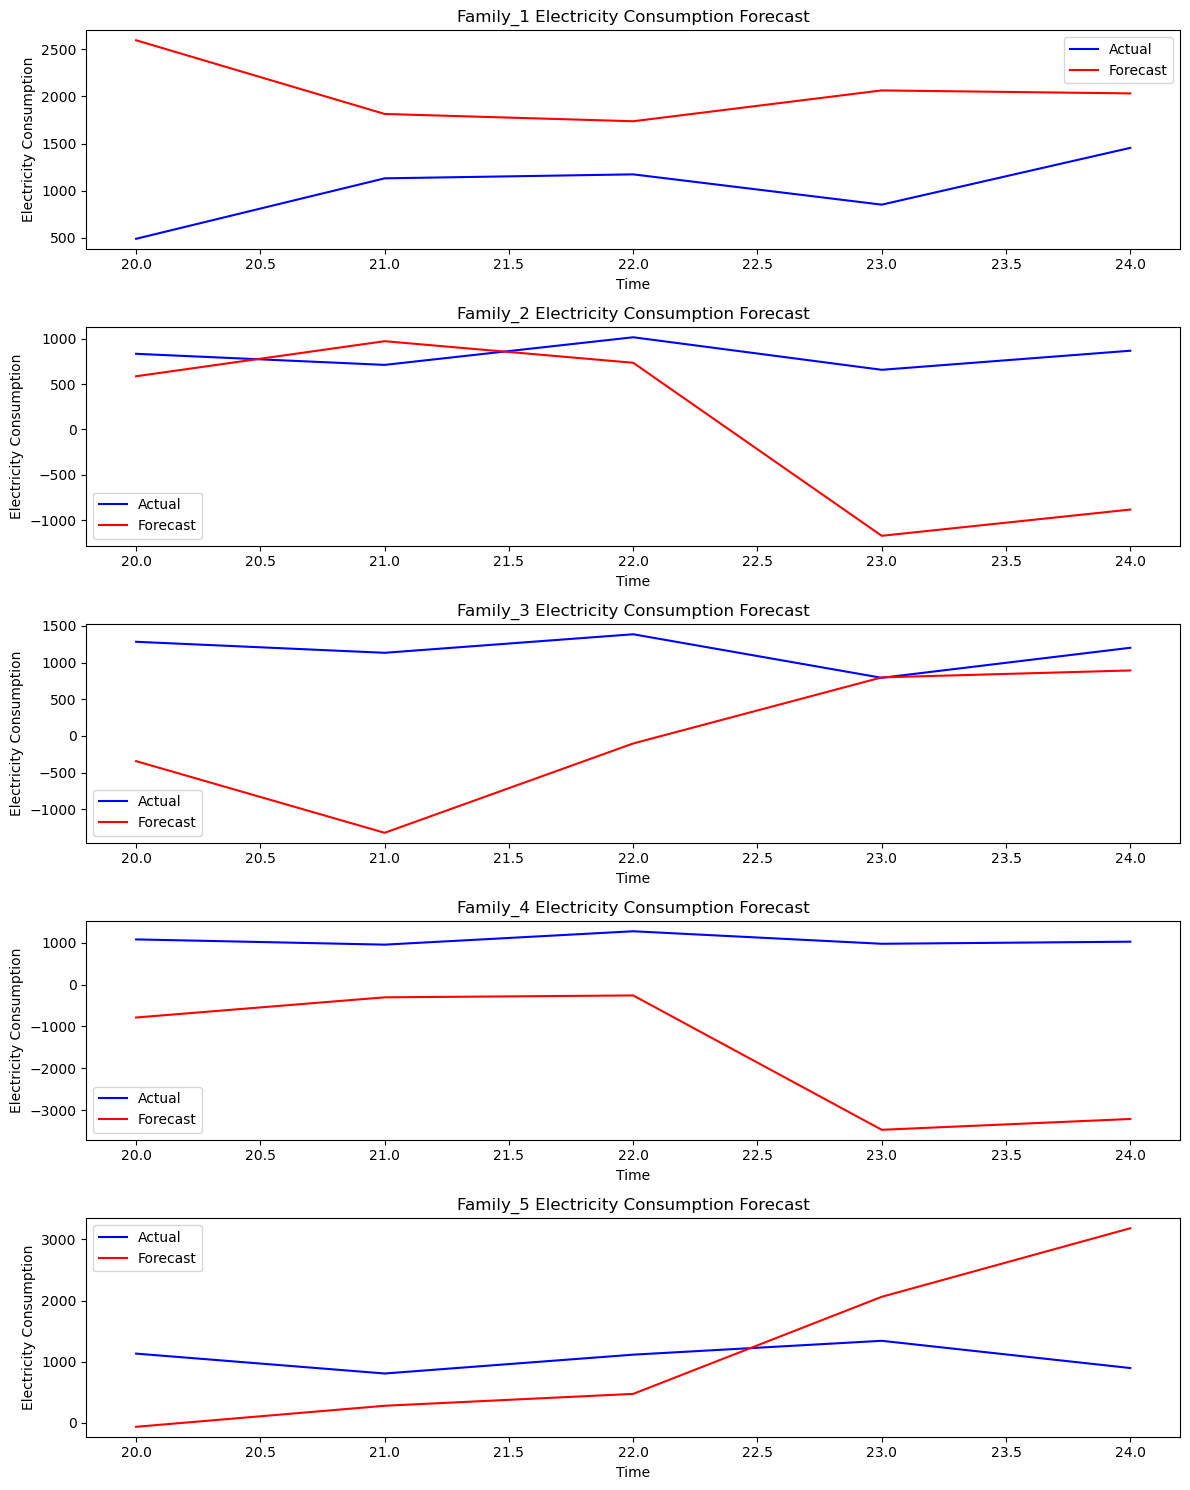

In [9]:
# Tahap 4: Visualisasi Hasil Prediksi

# Plot forecast vs actual
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(12, 15))

for i, family in enumerate(['Family_1', 'Family_2', 'Family_3', 'Family_4', 'Family_5']):
    axes[i].plot(test_data.index, test_data[f'{family}_Electricity'], label='Actual', color='blue')
    axes[i].plot(test_data.index, forecast_results[f'{family}_Electricity'], label='Forecast', color='red')
    axes[i].set_title(f'{family} Electricity Consumption Forecast')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel('Electricity Consumption')
    axes[i].legend()

plt.tight_layout()
plt.show()
